In [3]:
import equinox as eqx
import os

# Foundational SSM imports
from foundational_ssm.utils import (
    h5_to_dict,
    load_model_and_state_from_checkpoint_wandb,
)
from foundational_ssm.transform import smooth_spikes
from foundational_ssm.plotting import (
    aggregate_bin_label_results,
    plot_pred_vs_targets_by_angle_bin,
    plot_best_worst_trials,
)
import jax
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

Loading BokehJS ...

# Using model loaded from checkpoint

wandb:   3 of 3 files downloaded.  


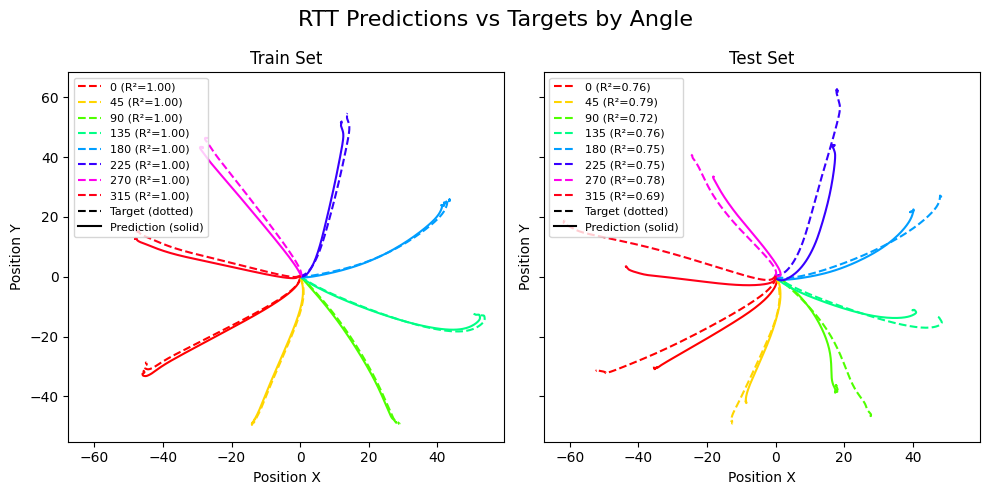

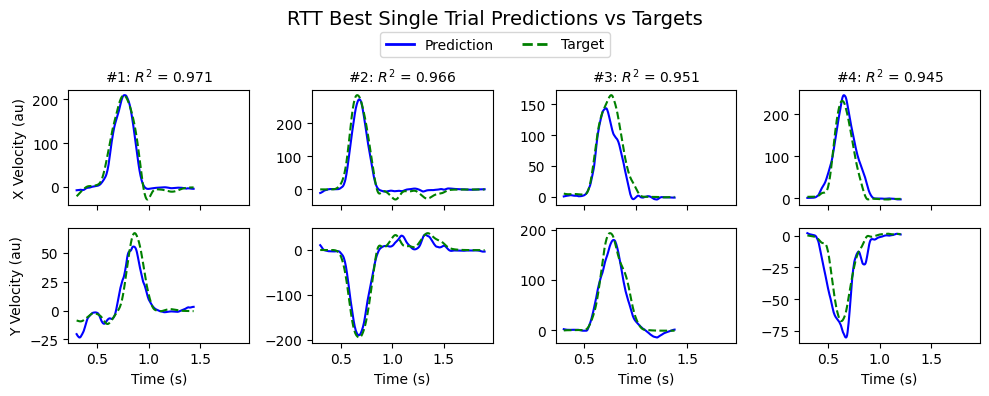

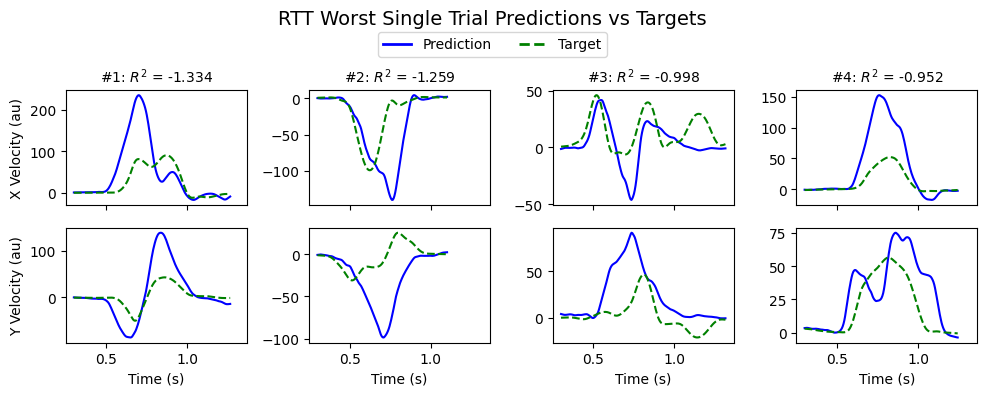

In [99]:
# Download mc_rtt_trialized from https://huggingface.co/datasets/MelinaLaimon/nlb_processed/tree/main
# Edit dataset_dir to your directory
dataset_dir = "../../data/foundational_ssm/processed/nlb"
trial_info = pd.read_csv(os.path.join(dataset_dir, "mc_rtt_trialized.csv"))
trial_info["angle_bin_label"] = (
    pd.cut(trial_info["reach_angle"], bins=8, labels=False) * 45
)
dataset_path = os.path.join(dataset_dir, "mc_rtt_trialized.h5")
data = h5_to_dict(dataset_path)
data["neural_input"] = smooth_spikes(
    data["neural_input"], kern_sd_ms=20, bin_size_ms=5, time_axis=1
)
input = data["neural_input"]
target_vel = data["behavior_input"]
mask = data["mask"]  # shape (num_trials, num_timesteps)
layer_keys = [
    "ssm_pre_activation"
]  # Specify which layer activations to return if you want them

run_name = "scratch_l2_os_indy_mc_rtt_trialized_all"
artifact_full_name = (
    f"melinajingting-ucl/foundational_ssm_downstream_sweep/{run_name}_checkpoint:best"
)
model, state, meta = load_model_and_state_from_checkpoint_wandb(artifact_full_name)
inf_model = eqx.nn.inference_mode(model)  # Switches off dropout
pred_vel, _, activations = jax.vmap(
    inf_model.call_with_activations, axis_name="batch", in_axes=(0, None, None)
)(input, state, layer_keys)
pred_vel = np.where(mask[:, :, None], pred_vel, 0)

WRITE_FIG_DIR = "/cs/student/projects1/ml/2024/mlaimon/UCL-ML-Thesis/Writeup/figures"
mask = data["mask"]  # shape (num_trials, num_timesteps)
results_df = aggregate_bin_label_results(
    trial_info, target_vel, pred_vel, skip_timesteps=60
)
fig = plot_pred_vs_targets_by_angle_bin(
    results_df,
    "RTT Predictions vs Targets by Angle",
    save_path=os.path.join(WRITE_FIG_DIR, f"rtt_pred_vs_target_by_angle_bin.pdf"),
)
fig.show()

# Plot best/worst trials for RTT validation split
plot_best_worst_trials(
    pred_vel=pred_vel,
    target_vel=target_vel,
    mask=mask,
    trial_info=trial_info,
    split_key="val",
    N=4,
    title_prefix="RTT",
    save_prefix="rtt",
    write_dir=WRITE_FIG_DIR,
)

wandb:   3 of 3 files downloaded.  


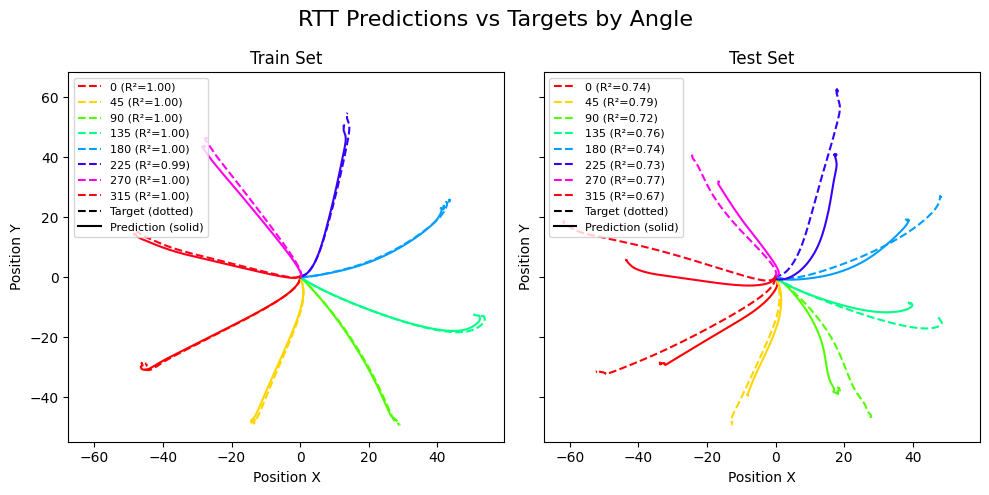

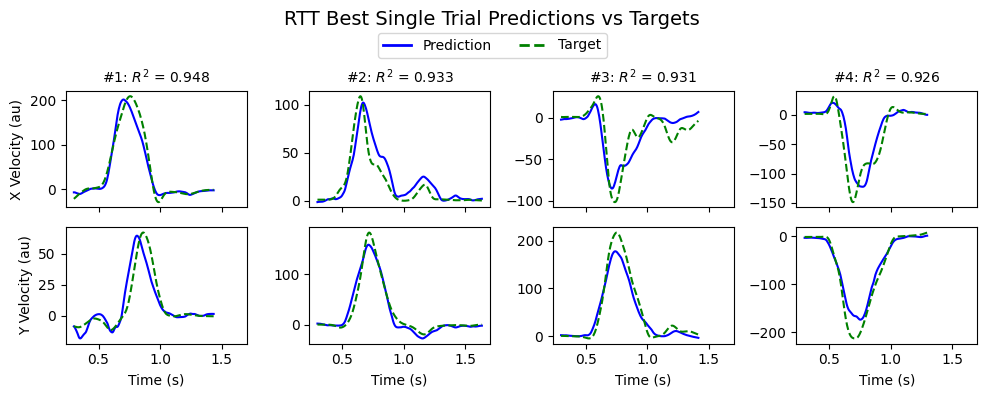

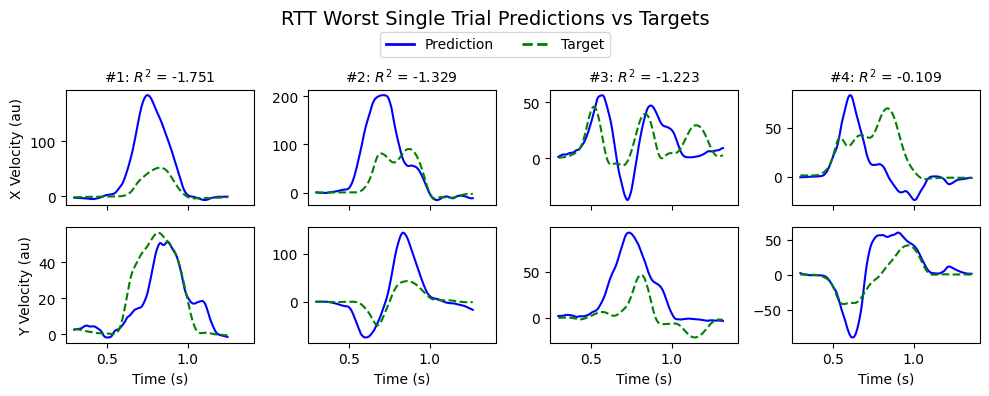

In [105]:
# Download mc_rtt_trialized from https://huggingface.co/datasets/MelinaLaimon/nlb_processed/tree/main
# Edit dataset_dir to your directory
dataset_dir = "../../data/foundational_ssm/processed/nlb"
trial_info = pd.read_csv(os.path.join(dataset_dir, "mc_rtt_trialized.csv"))
trial_info["angle_bin_label"] = (
    pd.cut(trial_info["reach_angle"], bins=8, labels=False) * 45
)
dataset_path = os.path.join(dataset_dir, "mc_rtt_trialized.h5")
data = h5_to_dict(dataset_path)
data["neural_input"] = smooth_spikes(
    data["neural_input"], kern_sd_ms=20, bin_size_ms=5, time_axis=1
)
input = data["neural_input"]
target_vel = data["behavior_input"]
mask = data["mask"]  # shape (num_trials, num_timesteps)
layer_keys = [
    "ssm_pre_activation"
]  # Specify which layer activations to return if you want them

run_name = "finetuned_l2_os_indy_mc_rtt_trialized_all"
artifact_full_name = (
    f"melinajingting-ucl/foundational_ssm_downstream_sweep/{run_name}_checkpoint:best"
)
model, state, meta = load_model_and_state_from_checkpoint_wandb(artifact_full_name)
inf_model = eqx.nn.inference_mode(model)  # Switches off dropout
pred_vel, _, activations = jax.vmap(
    inf_model.call_with_activations, axis_name="batch", in_axes=(0, None, None)
)(input, state, layer_keys)
pred_vel = np.where(mask[:, :, None], pred_vel, 0)

WRITE_FIG_DIR = "/cs/student/projects1/ml/2024/mlaimon/UCL-ML-Thesis/Writeup/figures"
mask = data["mask"]  # shape (num_trials, num_timesteps)
results_df = aggregate_bin_label_results(
    trial_info, target_vel, pred_vel, skip_timesteps=60
)
fig = plot_pred_vs_targets_by_angle_bin(
    results_df,
    "RTT Predictions vs Targets by Angle",
    save_path=os.path.join(WRITE_FIG_DIR, f"rtt_pred_vs_target_by_angle_bin.pdf"),
)
fig.show()

# Plot best/worst trials for RTT validation split
plot_best_worst_trials(
    pred_vel=pred_vel,
    target_vel=target_vel,
    mask=mask,
    trial_info=trial_info,
    split_key="val",
    N=4,
    title_prefix="RTT",
    save_prefix="rtt",
    write_dir=WRITE_FIG_DIR,
)

# Prediction vs Target of Area2Bump

wandb:   3 of 3 files downloaded.  


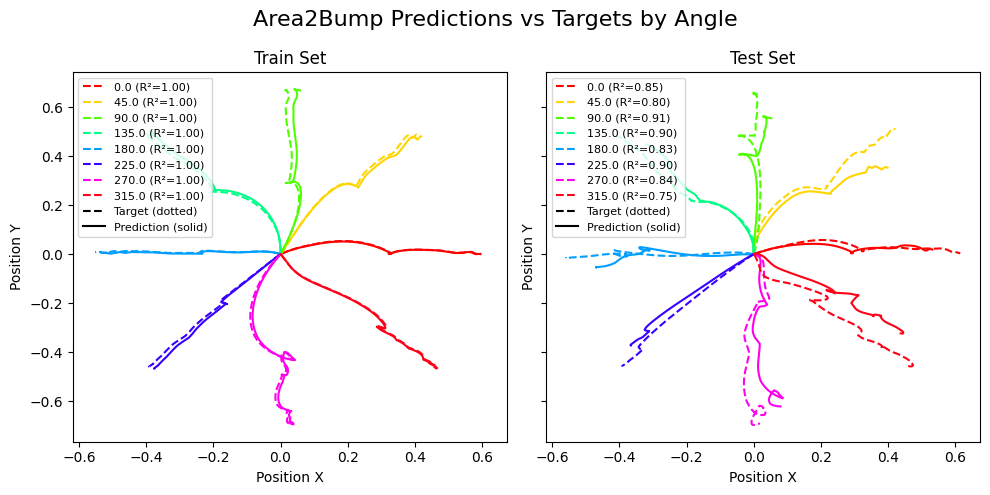

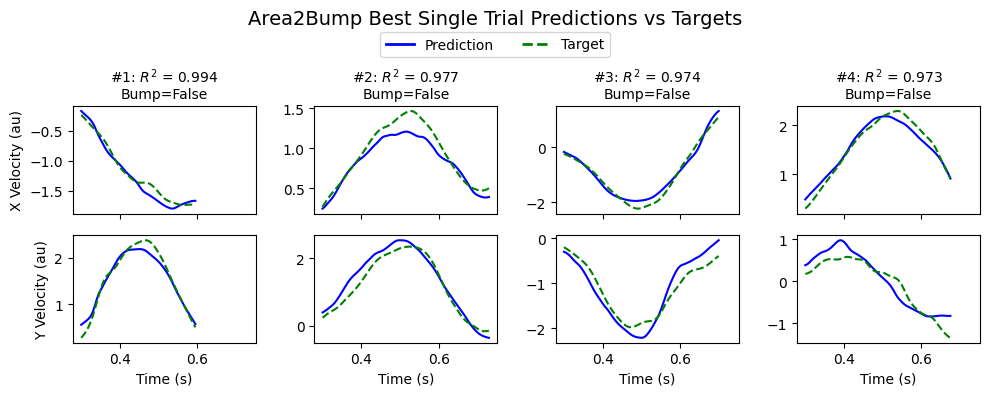

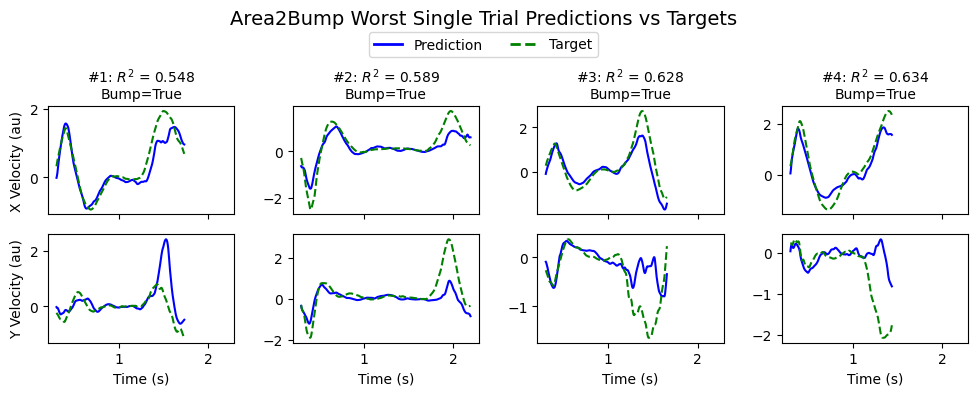

In [100]:
dataset_dir = "../../data/foundational_ssm/processed/nlb"
trial_info = pd.read_csv(os.path.join(dataset_dir, "area2_bump.csv"))
trial_info["angle_bin_label"] = trial_info["target_dir"]
trial_info = trial_info[trial_info["split"].isin(["train", "val"])]
trial_info["bump"] = trial_info["ctr_hold_bump"]
trial_info = trial_info.reset_index(drop=True)
dataset_path = os.path.join(dataset_dir, "mc_area2bump_prepend_all.h5")
data = h5_to_dict(dataset_path)
data["neural_input"] = smooth_spikes(
    data["neural_input"], kern_sd_ms=20, bin_size_ms=5, time_axis=1
)
input = data["neural_input"]
target_vel = data["behavior_input"]
mask = data["mask"]  # shape (num_trials, num_timesteps)
layer_keys = [
    "ssm_pre_activation"
]  # Specify which layer activations to return if you want them

run_name = "scratch_l4_reaching_mc_area2bump_prepend_all"
artifact_full_name = (
    f"melinajingting-ucl/foundational_ssm_downstream_sweep/{run_name}_checkpoint:best"
)
model, state, meta = load_model_and_state_from_checkpoint_wandb(artifact_full_name)
inf_model = eqx.nn.inference_mode(model)  # Switches off dropout
pred_vel, _, activations = jax.vmap(
    inf_model.call_with_activations, axis_name="batch", in_axes=(0, None, None)
)(input, state, layer_keys)
pred_vel = np.where(mask[:, :, None], pred_vel, 0)

WRITE_FIG_DIR = "/cs/student/projects1/ml/2024/mlaimon/UCL-ML-Thesis/Writeup/figures"
mask = data["mask"]  # shape (num_trials, num_timesteps)
results_df = aggregate_bin_label_results(
    trial_info, target_vel, pred_vel, skip_timesteps=60
)
fig = plot_pred_vs_targets_by_angle_bin(
    results_df,
    "Area2Bump Predictions vs Targets by Angle",
    save_path=os.path.join(WRITE_FIG_DIR, f"area2bump_pred_vs_target_by_angle_bin.pdf"),
)
fig.show()

# Plot best/worst trials for Area2Bump validation split
plot_best_worst_trials(
    pred_vel=pred_vel,
    target_vel=target_vel,
    mask=mask,
    trial_info=trial_info,
    split_key="val",
    N=4,
    title_prefix="Area2Bump",
    save_prefix="area2bump",
    write_dir=WRITE_FIG_DIR,
    title_cols="bump",
)

In [101]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd


def compute_grouped_r2(
    trial_info: pd.DataFrame,
    pred_vel: np.ndarray,
    target_vel: np.ndarray,
    mask: np.ndarray,
    group_col: str,
    split_key: str = "val",
    warmup_steps: int = 60,
) -> pd.DataFrame:
    """Compute mean/std variance-weighted R² per group value.

    Args:
        trial_info: DataFrame with at least columns [split, group_col].
        pred_vel: (trials, timesteps, 2)
        target_vel: (trials, timesteps, 2)
        mask: (trials, timesteps) boolean/int
        group_col: column name to group by (e.g., 'ctr_hold_bump', 'target_dir')
        split_key: which split to use (e.g., 'val')
        warmup_steps: number of steps to ignore at the start
    Returns:
        DataFrame with columns [group_col, r2_mean, r2_std, n]
    """
    assert group_col in trial_info.columns, f"Column '{group_col}' not in trial_info"

    # Filter to the requested split
    idx = (trial_info["split"] == split_key).values
    pv = pred_vel[idx]
    tv = target_vel[idx]
    mk = mask[idx].copy()

    # Ignore warmup
    if warmup_steps > 0:
        mk[:, :warmup_steps] = 0

    # Group labels per kept trial
    groups = trial_info.loc[idx, group_col].values

    # Compute per-trial variance-weighted R²
    r2s = []
    for i in range(pv.shape[0]):
        targ_m = np.where(mk[i, :, None], tv[i], 0)
        pred_m = np.where(mk[i, :, None], pv[i], 0)
        r2 = r2_score(targ_m, pred_m, multioutput="variance_weighted")
        r2s.append(r2)
    r2s = np.asarray(r2s, dtype=float)

    # Aggregate per group
    df = pd.DataFrame({group_col: groups, "r2": r2s})
    out = (
        df.groupby(group_col)["r2"]
        .agg(
            r2_mean="mean",
            r2_std=lambda x: x.std(ddof=1) if len(x) > 1 else 0.0,
            n="count",
        )
        .reset_index()
        .sort_values("r2_mean", ascending=False)
        .reset_index(drop=True)
    )
    return out


# Compute for Area2Bump (validation split)
r2_by_ctr = (
    compute_grouped_r2(
        trial_info,
        pred_vel,
        target_vel,
        mask,
        group_col="ctr_hold_bump",
        split_key="val",
    )
    if "ctr_hold_bump" in trial_info.columns
    else None
)
r2_by_target_dir = (
    compute_grouped_r2(
        trial_info, pred_vel, target_vel, mask, group_col="target_dir", split_key="val"
    )
    if "target_dir" in trial_info.columns
    else None
)

r2_by_ctr, r2_by_target_dir

(   ctr_hold_bump   r2_mean    r2_std   n
 0          False  0.912012  0.053271  52
 1           True  0.809127  0.100472  40,
    target_dir   r2_mean    r2_std   n
 0       135.0  0.907929  0.074582  13
 1       225.0  0.907560  0.063667  13
 2        90.0  0.904842  0.048873  11
 3         0.0  0.863263  0.100311  19
 4       270.0  0.852352  0.047625  10
 5       180.0  0.836717  0.088636   6
 6        45.0  0.832175  0.121863  13
 7       315.0  0.781567  0.119556   7)

# Pred vs Target of T, CO 20130909

wandb:   3 of 3 files downloaded.  
/cs/student/projects1/ml/2024/mlaimon/anaconda3/envs/foundational_ssm/lib/python3.13/multiprocessing/popen_fork.py:67: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/tmp/ipykernel_115018/2182443176.py:42: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  batch = {k: np.array(v) for k, v in batch.items()}


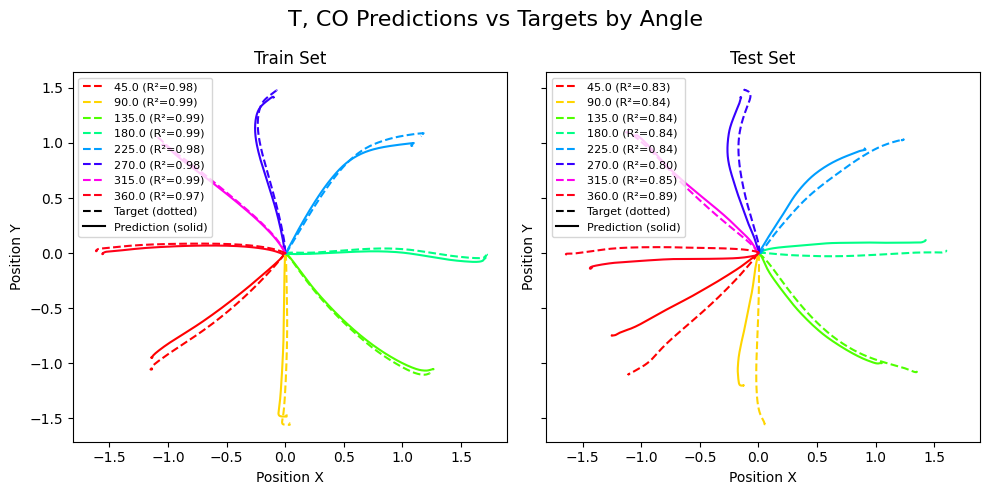

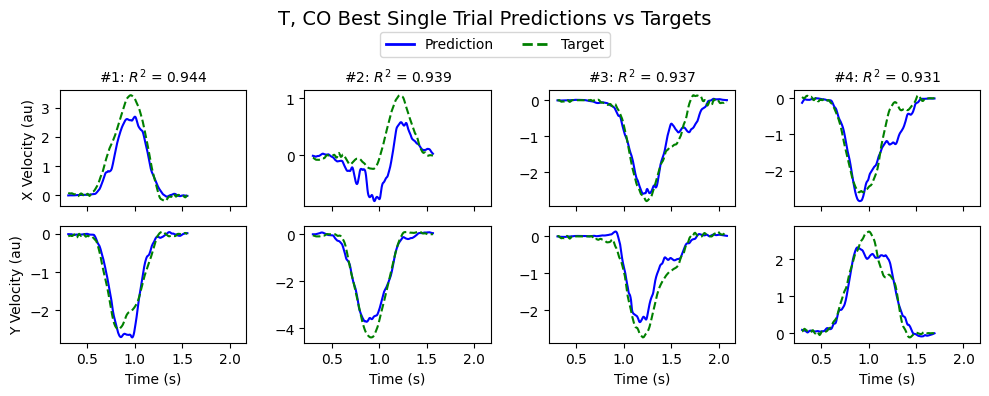

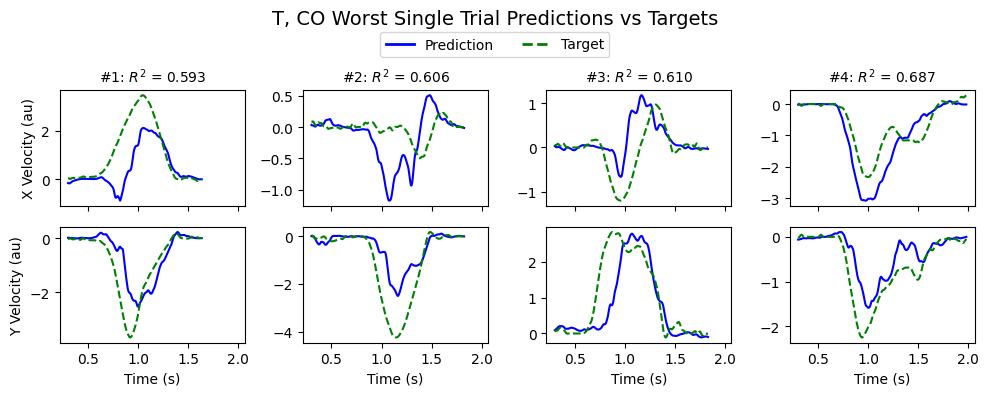

In [104]:
from foundational_ssm.constants import DATA_ROOT
from foundational_ssm.loaders import get_brainset_data_loader

recording_id = "perich_miller_population_2018/t_20130821_center_out_reaching"
dataset, loader, max_neural_input = get_brainset_data_loader(
    dataset_args={"keep_files_open": False, "lazy": True, "recording_id": recording_id},
    dataloader_args={
        "batch_size": 256,
        "num_workers": 2,
        "persistent_workers": True,
    },
    sampler="TrialSampler",
    sampler_args={"max_window_length": 5.0},
    data_root="../" + DATA_ROOT,
    prepend_history=0.3,
    sampling_rate=200,
    split="trial",  # train_trial overlaps with training data. use val_trial, test_trial if you want to observe what happens outside
)
recording = dataset.get_recording_data(recording_id)
val_start = (recording.end - recording.start) * 0.7
trials = recording.trials.select_by_mask(recording.trials.is_valid)
trial_info = pd.DataFrame(
    {
        "trial_id": np.arange(len(trials)),
        "angle_bin_label": trials.target_dir / np.pi * 180 + 180,
        "split": np.where(trials.start_time < val_start, "train", "val"),
    }
)
run_name = "scratch_l2_reaching_t_20130821_center_out_reaching_all"
artifact_full_name = (
    f"melinajingting-ucl/foundational_ssm_downstream_sweep/{run_name}_checkpoint:best"
)
model, state, meta = load_model_and_state_from_checkpoint_wandb(artifact_full_name)
inf_model = eqx.nn.inference_mode(model)  # Switches off dropout

for batch in loader:
    batch = {k: np.array(v) for k, v in batch.items()}
    neural_input = batch["neural_input"]  # normalize
    target_vel = batch["behavior_input"]
    mask = batch["mask"]
    pred_vel, _, activations = jax.vmap(
        inf_model.call_with_activations, axis_name="batch", in_axes=(0, None, None)
    )(neural_input, state, layer_keys)
    pred_vel = np.where(mask[:, :, None], pred_vel, 0)
    break  # Only do one batch for demo

results_df = aggregate_bin_label_results(
    trial_info, target_vel, pred_vel, skip_timesteps=60
)
fig = plot_pred_vs_targets_by_angle_bin(
    results_df,
    "T, CO Predictions vs Targets by Angle",
    save_path=os.path.join(WRITE_FIG_DIR, f"tco_pred_vs_target_by_angle_bin.pdf"),
)
fig.show()

# Plot best/worst trials for Area2Bump validation split
plot_best_worst_trials(
    pred_vel=pred_vel,
    target_vel=target_vel,
    mask=mask,
    trial_info=trial_info,
    split_key="val",
    N=4,
    title_prefix="T, CO",
    save_prefix="tco",
    write_dir=WRITE_FIG_DIR,
)